## Analiza letalskih nesreč

#### Priprava podatkov

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

PlaneCrashes = "./Podatki/PlaneCrashes.csv"
reader = csv.DictReader(open(PlaneCrashes, 'rt', encoding='utf-8'))

#sample = csv.DictReader(open("./Podatki/sample.csv", 'rt', encoding='utf-8'))


### 1. Kako se število nesreč spreminja skozi čas?

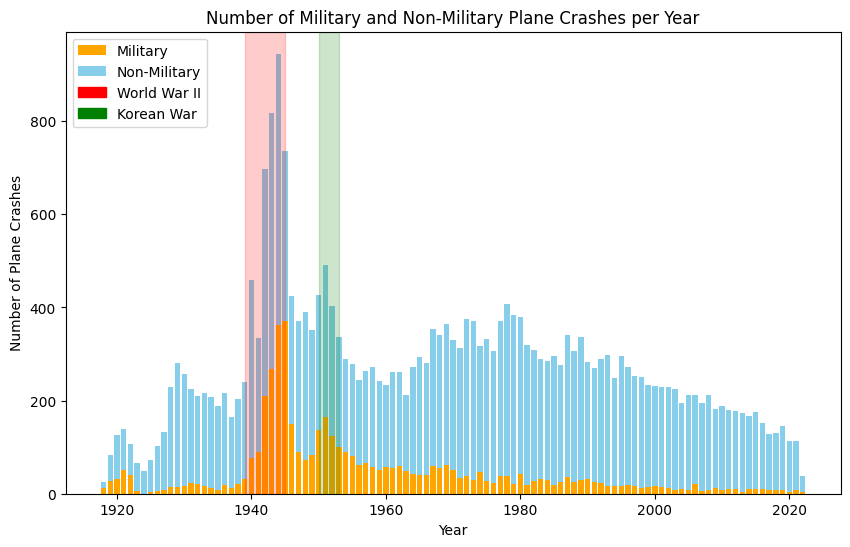

In [2]:
# Read the data
military_years = {}
total_years = {}

reader = csv.DictReader(open("./Podatki/PlaneCrashes.csv", 'rt', encoding='utf-8'))
for row in reader:
    datum = datetime.strptime(row['Date'], '%Y-%m-%d %H:%M:%S')
    flight_type = row['Flight type']
    if datum.year not in total_years:
        total_years[datum.year] = 1
        if flight_type == 'Military':
            military_years[datum.year] = 1
        else:
            military_years[datum.year] = 0
    else:
        total_years[datum.year] += 1
        if flight_type == 'Military':
            military_years[datum.year] += 1

x = list(total_years.keys())
y_total = [total_years[year] for year in x]
y_military = [military_years[year] for year in x]

# Plot the data
plt.figure(figsize=(10, 6))
bars_military = plt.bar(x, y_military, color='orange', label='Military')
bars_non_military = plt.bar(x, np.array(y_total) - np.array(y_military), bottom=y_military, color='skyblue', label='Non-Military')
plt.xlabel('Year')
plt.ylabel('Number of Plane Crashes')
plt.title('Number of Military and Non-Military Plane Crashes per Year')

# Annotate the most important wars and events
important_events = {
    "World War II": (1939, 1945),
    "Korean War": (1950, 1953)
    # Add more events if necessary
}

# Assign colors to each event
colors = ['red', 'green']  # You can add more colors if needed
color_map = {event: color for event, color in zip(important_events.keys(), colors)}

for event, years_range in important_events.items():
    plt.axvspan(years_range[0], years_range[1], color=color_map[event], alpha=0.2)

# Create legend
legend_labels = [bars_military, bars_non_military]
legend_labels.extend([plt.Rectangle((0,0),1,1, color=color_map[event]) for event in important_events.keys()])
legend_labels.extend(['Military', 'Non-Military'])
plt.legend(legend_labels, ['Military', 'Non-Military'] + list(important_events.keys()), loc='upper left')

plt.show()


### 2. Ali in kako faze, v katerih se je zgodila nesreča, in vrste letov (komercialni, vojaški itd.) vplivajo na odstotek oz. število umrlih potnikov?

### 3. Ali in kako kraj nesreče in število potnikov vplivata na število smrtnih žrtev med ljudmi, ki niso bili potniki?

### 4. Katera letala so najbolj nevarna?

### 5. Ali in kateri modeli letal ter vrste letov so bolj nagnjeni k določenim vrstam nesreč (tehnična okvara, človeška napaka itd.)?

### 6. Kako ura vpliva na nesreče, ali se bolj pogosto dogajajo ponoči?

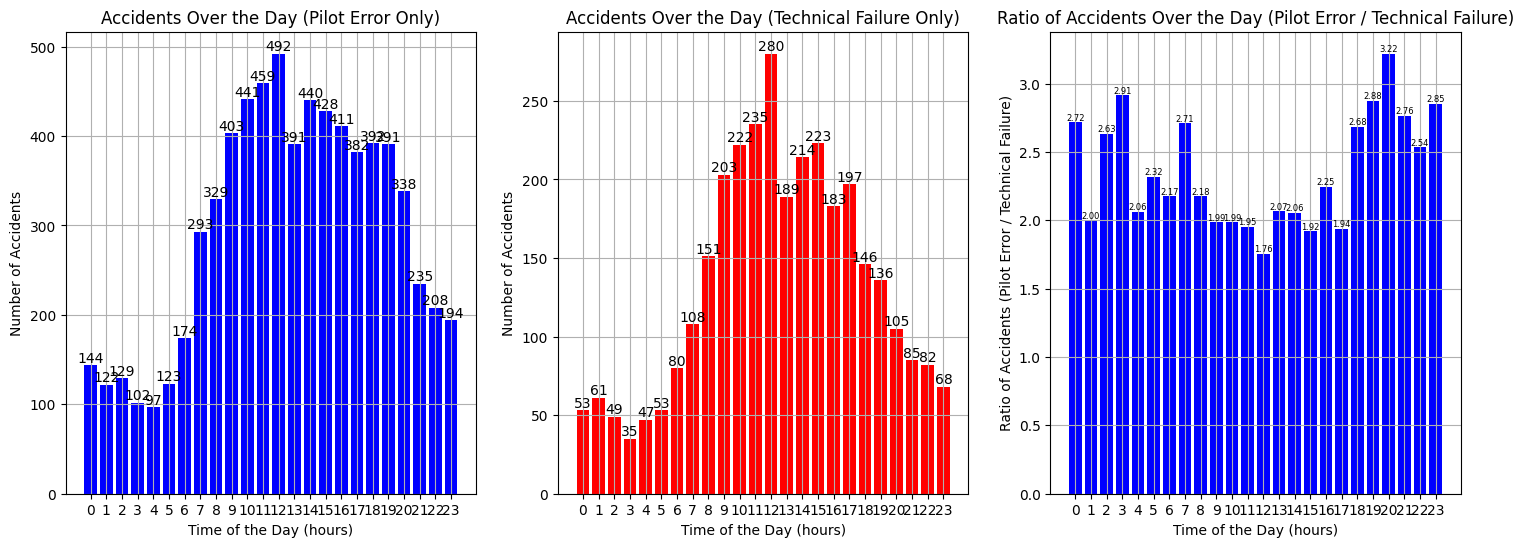

<Figure size 640x480 with 0 Axes>

In [2]:
def read_data(filename, cause):
    times = []
    with open(filename, 'rt', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if row['Crash cause'] == cause and row['Time']:
                time_components = row['Time'].split(" ")
                try:
                    if 'H' in time_components[0]:
                        hour = int(time_components[0][:-1])
                    else:
                        hour = 0
                    times.append(hour)
                except ValueError:
                    print("Invalid time format, skipping:", row['Time'])
    return times

def plot_data(times, title, color='b'):
    unique_hours, counts = np.unique(times, return_counts=True)
    plt.bar(unique_hours, counts, color=color)
    plt.xlabel('Time of the Day (hours)')
    plt.ylabel('Number of Accidents')
    plt.title(title)
    plt.xticks(np.arange(0, 24, step=1))
    plt.grid(True)
    for i in range(len(unique_hours)):
        plt.text(unique_hours[i], counts[i], str(counts[i]), ha='center', va='bottom')

def plot_ratio(pilot_error_times, technical_failure_times):
    # Count occurrences of accidents for each category
    pilot_error_counts = np.bincount(pilot_error_times).astype(float)  # Convert to float
    technical_failure_counts = np.bincount(technical_failure_times).astype(float)  # Convert to float
    
    # Calculate the ratio of occurrences of accidents
    ratio = np.divide(pilot_error_counts, technical_failure_counts, out=np.zeros_like(pilot_error_counts), where=technical_failure_counts!=0)
    
    # Plotting
    plt.bar(np.arange(24), ratio, color='b' if max(ratio) >= 1 else 'r')
    plt.xlabel('Time of the Day (hours)')
    plt.ylabel('Ratio of Accidents (Pilot Error / Technical Failure)')
    plt.title('Ratio of Accidents Over the Day (Pilot Error / Technical Failure)')
    plt.xticks(np.arange(0, 24, step=1))
    plt.grid(True)
    
    # Add text labels above each bar
    for i in range(24):
        plt.text(i, ratio[i], f'{ratio[i]:.2f}', ha='center', va='bottom', fontsize=6)  # Adjust fontsize here
    
    # Show plot
    plt.show()

pilot_error_times = read_data(PlaneCrashes, "Human factor")
technical_failure_times = read_data(PlaneCrashes, "Technical failure")

plt.figure(figsize=(18, 6))

# Graf za nesreče zaradi pilotne napake
plt.subplot(1, 3, 1)
plot_data(pilot_error_times, 'Accidents Over the Day (Pilot Error Only)', 'b')

# Graf za nesreče zaradi tehničnih napak
plt.subplot(1, 3, 2)
plot_data(technical_failure_times, 'Accidents Over the Day (Technical Failure Only)', 'r')

# Graf za razliko med nesrečami zaradi pilotne napake in tehničnih napak
plt.subplot(1, 3, 3)
plot_ratio(pilot_error_times, technical_failure_times)

plt.tight_layout()
plt.show()

### 7. Ali starost posameznega letala vpliva na možnost nesreče?

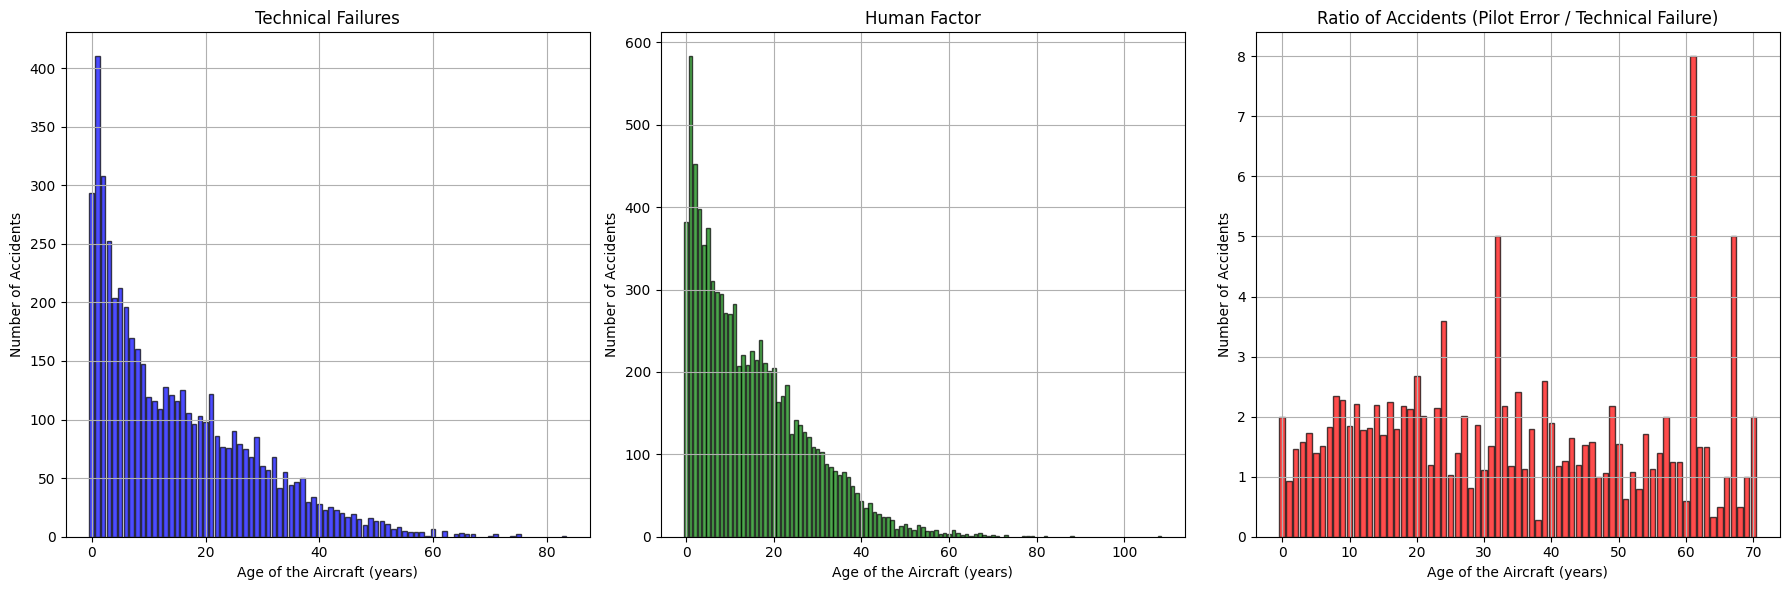

In [22]:
def read_csv_data(file_path, crash_cause):
    ages = {}
    with open(file_path, 'rt', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if row['Crash cause'] == crash_cause and row['YOM']:
                try:
                    year_of_manufacture = int(row['YOM'])
                    crash_date = datetime.strptime(row['Date'], "%Y-%m-%d %H:%M:%S").year
                    age = crash_date - year_of_manufacture
                    if age > -1 and age < 116:
                        if age in ages:
                            ages[age] += 1
                        else:
                            ages[age] = 1
                except ValueError:
                    print("Invalid year of manufacture, skipping:", row['YOM'])
    return ages

def plot_histogram(data_dict, title, color):
    keys = list(data_dict.keys())
    values = list(data_dict.values())
    
    plt.bar(keys, values, color=color, edgecolor='black', alpha=0.7)
    plt.xlabel('Age of the Aircraft (years)')
    plt.ylabel('Number of Accidents')
    plt.title(title)
    plt.grid(True)
    #plt.show()

def plot_ratio(human_data_dict, technical_data_dict):
    # Convert dictionary values to lists
    human_data = list(human_data_dict.values())
    technical_data = list(technical_data_dict.values())

    # Trim both arrays to the minimum length
    min_length = min(len(human_data), len(technical_data))
    human_data = human_data[:min_length]
    technical_data = technical_data[:min_length]

    # Convert data to float arrays
    human_data = np.array(human_data).astype(float)
    technical_data = np.array(technical_data).astype(float)
    
    # Calculate ratio, handle division by zero
    with np.errstate(divide='ignore', invalid='ignore'):
        ratio_data = np.where(technical_data != 0, human_data / technical_data, np.nan)

    # Plot histogram
    plot_histogram({i: ratio_data[i] for i in range(len(ratio_data))}, 'Ratio of Accidents (Pilot Error / Technical Failure)', 'r')

plt.figure(figsize=(18, 6))
# Graf za nesreče zaradi tehničnih napak
technical_data = read_csv_data(PlaneCrashes, "Technical failure")
plt.subplot(1, 3, 1)
plot_histogram(technical_data, 'Technical Failures', 'b')

# Graf za nesreče zaradi človeškega faktorja
human_data = read_csv_data(PlaneCrashes, "Human factor")
plt.subplot(1, 3, 2)
plot_histogram(human_data, 'Human Factor', 'g')

# Graf za razmerje med nesrečami
plt.subplot(1, 3, 3)
plot_ratio(human_data, technical_data)

plt.tight_layout()
plt.show()


### 8. Ali so določeni operatorji ali države bolj nagnjeni k nesrečam, in če da, zakaj?

### 9. Ali imajo določeni kraji nesreče (ocean, letališče itd.) večjo možnost preživetja?

### 10. Ali ima posadka večjo možnost preživetja kot običajni potniki na komercialnih letalih?